In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'E:\Data Scientist\100Days-_of_coding\SalesAnalysis\data.csv')
#Checking columns name
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
#changing date  to pandas datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst= True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst= True)
#extracting year
df['Order Year'] = df['Order Date'].dt.year
df['Ship Year'] = df['Ship Date'].dt.year
#checking for nan values
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Order Year        0
Ship Year         0
dtype: int64

In [ ]:

# print(df['Postal Code'][df['Postal Code'].isna()]
#aggregate function to get mode of each city on the basis of postal code
mode_per_city = (
    df.groupby('City')['Postal Code']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA )
)
#filling nan post with mode
df['Postal Code'] = df['Postal Code'].fillna(df['City'].map(mode_per_city))

In [ ]:
#checking if duplicates exits
# print(sum(df.duplicated()))

#Sales per Region,Mean of City on the basis of sales,Maximum sale by a country (usa only since it was only there)
most_sales_by_region = df.groupby('Region')['Sales'].sum()
average_sales_by_city = df.groupby('City')['Sales'].mean()
highest_sales_by_country = df.groupby('Country')['Sales'].max()

#Giving badge on the basis of number of transactions
#counting transaction
most_ordering_customer = df['Customer Name'].value_counts()
bins = [0, 5, 10, 20, 30, float('inf')]
labels = ['newbie', 'normal', 'regular', 'exclusive', 'vip']
badge = pd.cut(most_ordering_customer, bins=bins, labels=labels)
#mapping badges
df['Badge'] = df['Customer Name'].map(badge)

# print(most_sales_by_region.head(2))
# print(most_ordering_customer.head(2))

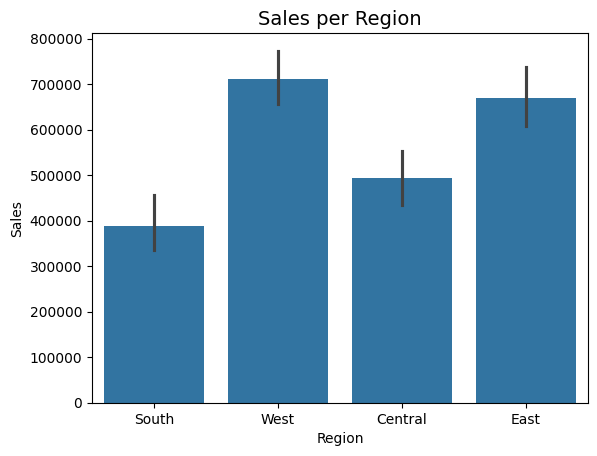

In [ ]:
#ploating on basis of most sales 
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title('Sales per Region', fontsize=14)
plt.show()

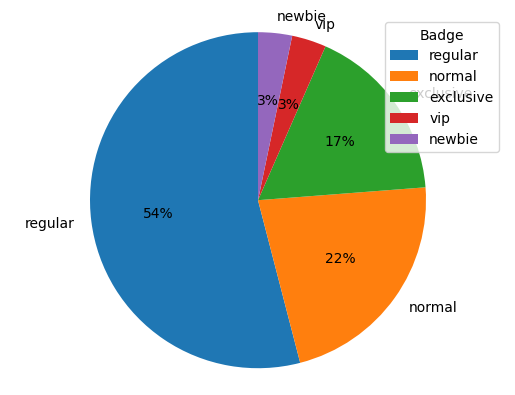

In [ ]:
#badge dominates
badge_counts = df['Badge'].value_counts()
plt.pie(badge_counts, labels=badge_counts.index,autopct='%1.f%%',  startangle=90,)
plt.axis('equal')
plt.legend(badge_counts.index, title="Badge", loc="best")
plt.show()

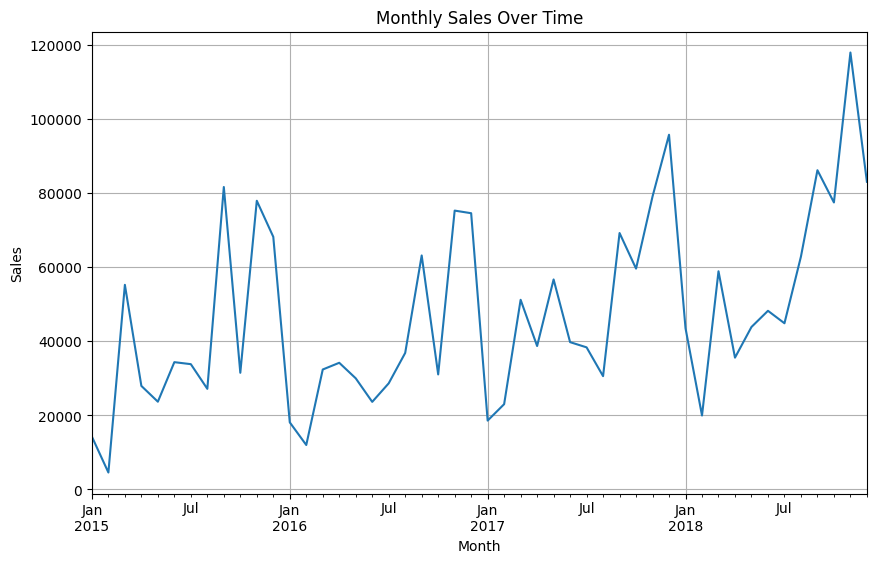

In [ ]:
#monthly sales analysix
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,6))
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()